# 1. Import Required Libraries & Dataset

In [ ]:
! pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# chỉ định GPU
device = torch.device("cuda")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_tweets3.csv to sentiment_tweets3.csv


In [ ]:
#@title Titre par défaut
file_path = list(uploaded.keys())[0]

# Đọc file Excel bằng pandas

df = pd.read_csv(file_path)
df.head()

,message to examine,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
# phân phối lớp nhãn
df['label (depression result)'].value_counts(normalize = True)

0    0.775645
1    0.224355
Name: label (depression result), dtype: float64

# 2. Split the Dataset into train / test

In [ ]:
# chia tập dữ liệu đào tạo thành tập đào tạo, xác nhận và kiểm tra
train_text, temp_text, train_labels, temp_labels = train_test_split(df['message to examine'], df['label (depression result)'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=df['label (depression result)'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.5,
                                                                stratify=temp_labels)


In [ ]:
train_text.tolist()

# 3. Import Bert - base- uncased

In [ ]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

# Khởi tạo tokenizer và mô hình BERT
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

# Câu đầu vào
sentence = "Hello, how are you. I'm good? Hello, how are you. I'm good? Hello, how are you. I'm good? Hello, how are you. I'm good? Hello, how are you. I'm good? Hello, how are you. I'm good?"

# Mã hóa câu thành chuỗi token
# tokens = tokenizer.encode(sentence, add_special_tokens=True)
tokens = tokenizer.encode_plus(
    sentence,
    max_length=25,
    pad_to_max_length=True,
    truncation=True,
    return_tensors="pt"
)

# Chuyển đổi chuỗi token thành tensor
input_ids = tokens["input_ids"]
# input_ids = torch.tensor(tokens).unsqueeze(0)
# print("Token: ", tokens)
# print("Input id: ", input_ids)

# Mã hóa câu bằng mô hình BERT
outputs = model(input_ids)

# Lấy vector đại diện cho câu
sentence_embedding = outputs[0]

# In ra kích thước vector đại diện
print("Kích thước vector đại diện:", sentence_embedding.size())

# In ra vector đại diện
print("Vector đại diện:", sentence_embedding)

print("Token IDs:", tokens['input_ids'])
print("Attention Mask:", tokens['attention_mask'])


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, 

Kích thước vector đại diện: torch.Size([1, 25, 768])
Vector đại diện: tensor([[[-0.2024,  0.0506, -0.2949,  ..., -0.3952,  0.2930,  0.5352],
         [ 0.1852,  0.0057,  0.4058,  ...,  0.0317,  0.9955, -0.0275],
         [-0.7567,  0.6057,  0.6003,  ..., -0.7822,  0.2961, -0.0874],
         ...,
         [-0.1538, -0.5658,  0.1712,  ..., -0.2319,  0.5619,  0.6968],
         [-0.1507, -0.0200,  0.7067,  ...,  0.1286, -0.1477, -0.3309],
         [-0.0335,  0.4694,  0.0152,  ...,  0.7130, -0.4216, -0.1495]]],
       grad_fn=<NativeLayerNormBackward0>)
Token IDs: tensor([[ 101, 7592, 1010, 2129, 2024, 2017, 1012, 1045, 1005, 1049, 2204, 1029,
         7592, 1010, 2129, 2024, 2017, 1012, 1045, 1005, 1049, 2204, 1029, 7592,
          102]])
Attention Mask: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1]])


In [ ]:
# from transformers import AutoTokenizer

# # Khởi tạo tokenizer
# tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# # Câu đầu vào
# sentence = "This is a sample sentence for encoding with a length of 50 tokens. It will be truncated if necessary. This is a sample sentence for encoding with a length of 50 tokens. It will be truncated if necessary. This is a sample sentence for encoding with a length of 50 tokens. It will be truncated if necessary."
# sentence1 = "This is a sample"
# # Mã hóa câu thành chuỗi token
# tokens = tokenizer.encode_plus(
#     sentence1,
#     max_length=25,
#     pad_to_max_length=True,
#     truncation=True,
#     return_tensors="pt"
# )

# # In ra kết quả
# print("Token IDs:", tokens['input_ids'])
# print("Attention Mask:", tokens['attention_mask'])


<Axes: >

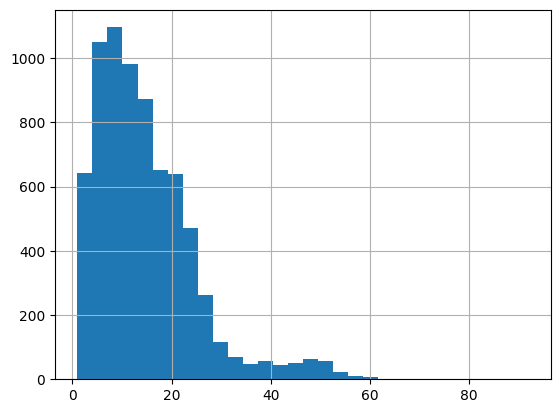

In [ ]:
# lấy độ dài của tất cả các tin nhắn trong datafame
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

# 4. Tokenize & Encode the Sequences

In [ ]:
# tokenize và encode câu trong tập training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize và encode câu trong tập validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode câu trong test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)
# print("Token IDs:", tokens_test['input_ids'])
# print("Attention Mask:", tokens_test['attention_mask'])
# print("Input Text:", test_text)
tokens_train


# 5. List to Tensors

In [ ]:
## chuyển lists về tensors

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())
# test_y[0]

input_ids = train_seq[0].unsqueeze(0)
input_mask = train_mask[0].unsqueeze(0)

# Mã hóa câu bằng mô hình BERT
outputs = bert(input_ids=input_ids, attention_mask=input_mask)

# Lấy vector đại diện cho câu
sentence_embedding = outputs.last_hidden_state

# In ra kích thước vector đại diện
print("Kích thước vector đại diện:", sentence_embedding.size())

# In ra vector đại diện
print("Vector đại diện:", sentence_embedding)
print("Token IDs:", tokens_train['input_ids'][0])
print("Attention Mask:", tokens_train['attention_mask'][0])

Kích thước vector đại diện: torch.Size([1, 25, 768])
Vector đại diện: tensor([[[ 0.0564,  0.1468,  0.3008,  ..., -0.3734,  0.0909,  0.5190],
         [ 1.3526,  1.0296,  0.3462,  ..., -0.5848,  0.3848, -0.0276],
         [-0.4109,  0.5155,  0.9667,  ..., -0.6132,  0.3435, -0.5608],
         ...,
         [ 0.0545,  0.0816,  0.7720,  ..., -0.2305, -0.2276,  0.4346],
         [ 0.2400,  0.1151,  0.7142,  ..., -0.1429, -0.0896,  0.3927],
         [-0.0802, -0.3671,  0.3564,  ...,  0.2983,  0.0977, -0.2307]]],
       grad_fn=<NativeLayerNormBackward0>)
Token IDs: [101, 1030, 17207, 9096, 4213, 28753, 2009, 1005, 1055, 8403, 2182, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
for i in range(5):
  print("Token IDs:", tokens_train['input_ids'][i])
  print("Attention Mask:", tokens_train['attention_mask'][i])

Token IDs: [101, 1030, 17207, 9096, 4213, 28753, 2009, 1005, 1055, 8403, 2182, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Token IDs: [101, 1045, 7078, 2293, 1996, 3185, 8101, 1999, 2293, 1004, 8318, 1025, 1017, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Token IDs: [101, 2390, 2015, 3490, 4842, 18827, 2021, 2008, 2057, 7113, 26029, 2003, 2525, 2006, 1996, 2208, 8840, 2140, 24264, 2213, 10468, 3038, 2507, 2149, 102]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Token IDs: [101, 1026, 7861, 29147, 2072, 1024, 17357, 1028, 6245, 1029, 22953, 12680, 7716, 29545, 1029, 14412, 23270, 10708, 1029, 2655, 2085, 2000, 4553, 2055, 102]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Token IDs: [101, 2105, 1012, 102, 0, 0, 0, 0, 0, 0

# 6. Data Loader

In [ ]:

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# định nghĩa cỡ batch
batch_size = 32

# gộp tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# bộ lấy mẫu để lấy mẫu dữ liệu trong quá trình train
train_sampler = RandomSampler(train_data)

# bộ tải dữ liệu tập train
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_seq, val_mask, val_y)
val_sampler = SequentialSampler(val_data)

# bộ tải dữ liệu tập val
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

# 7. Model Architecture

In [ ]:
for param in bert.parameters():
    param.requires_grad = False

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.1)

        # relu activation function
        self.relu =  nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768,512)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,2)

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

        #pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)

        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)

        # apply softmax activation
        x = self.softmax(x)

        return x

In [ ]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [ ]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:


from sklearn.utils.class_weight import compute_class_weight

# compute the class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)

print("Class Weights:", class_weights)


Class Weights: [0.64466869 2.22808642]


In [ ]:

# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 10

# 8. Fine - Tune

In [ ]:
# function to train the model
def train():

    model.train()
    total_loss, total_accuracy = 0, 0

    # empty list to save model predictions
    total_preds=[]

    # iterate over batches
    for step,batch in enumerate(train_dataloader):

        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        # push the batch to gpu
        batch = [r.to(device) for r in batch]

        sent_id, mask, labels = batch

        # clear previously calculated gradients
        model.zero_grad()

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)

      # predictions are in the form of (no. of batches, size of batch, no. of classes).
      # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds
train()

  Batch    50  of    226.
  Batch   100  of    226.
  Batch   150  of    226.
  Batch   200  of    226.


(0.6674123925972829,
 array([[-0.5034388 , -0.9274745 ],
        [-0.7296661 , -0.657915  ],
        [-0.58446234, -0.8151012 ],
        [-0.66077024, -0.72660756],
        [-0.66877824, -0.71812475],
        [-0.6873178 , -0.6990107 ],
        [-0.62714577, -0.7638144 ],
        [-0.45662397, -1.0035343 ],
        [-0.64984834, -0.73840606],
        [-0.6627742 , -0.7244716 ],
        [-0.6992619 , -0.6870696 ],
        [-0.6291003 , -0.76157844],
        [-0.48829284, -0.9510714 ],
        [-0.5011884 , -0.9309231 ],
        [-0.745119  , -0.64374346],
        [-0.49818623, -0.93555444],
        [-0.541751  , -0.8716252 ],
        [-0.51538825, -0.90948564],
        [-0.4988109 , -0.9345879 ]], dtype=float32))

In [ ]:
# function for evaluating the model
def evaluate():

    print("\nEvaluating...")

    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0

    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:

            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():

            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader)

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    #train model
    train_loss, _ = train()

    #evaluate model
    valid_loss, _ = evaluate()

    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10
  Batch    50  of    226.
  Batch   100  of    226.
  Batch   150  of    226.
  Batch   200  of    226.

Evaluating...

Training Loss: 0.631
Validation Loss: 0.607

 Epoch 2 / 10
  Batch    50  of    226.
  Batch   100  of    226.
  Batch   150  of    226.
  Batch   200  of    226.

Evaluating...

Training Loss: 0.604
Validation Loss: 0.576

 Epoch 3 / 10
  Batch    50  of    226.
  Batch   100  of    226.
  Batch   150  of    226.
  Batch   200  of    226.

Evaluating...

Training Loss: 0.572
Validation Loss: 0.548

 Epoch 4 / 10
  Batch    50  of    226.
  Batch   100  of    226.
  Batch   150  of    226.
  Batch   200  of    226.

Evaluating...

Training Loss: 0.549
Validation Loss: 0.521

 Epoch 5 / 10
  Batch    50  of    226.
  Batch   100  of    226.
  Batch   150  of    226.
  Batch   200  of    226.

Evaluating...

Training Loss: 0.525
Validation Loss: 0.497

 Epoch 6 / 10
  Batch    50  of    226.
  Batch   100  of    226.
  Batch   150  of    226.
  Batch   20

# 9. Make Predictions

In [ ]:
# get predictions for test data
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()

In [ ]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1201
           1       0.58      0.83      0.68       347

    accuracy                           0.83      1548
   macro avg       0.76      0.83      0.78      1548
weighted avg       0.86      0.83      0.84      1548

